4.3 Sie haben bereits gemessen, wie viele Sprechakte die Figuren in Ihrem Theaterstück jeweils haben. Sie können daraus einfach das arithmetische Mittel bilden. Können Sie für diesen Mittelwert mittels Bootstrapping das 95%-Konfidenzintervall ermitteln? (Tipp: Nutzen Sie die Numpy-Funktion np.random.choice())

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


electra_df = pd.read_csv("../Datensaetze/bette006_Galdos_Electra_nodes=characters.csv", sep="\t", index_col=0)
electra_df.head()

,id,label,sex,role,nature,importance,position,pers_mes_characters,pers_mes_sps,pers_mes_rss,pers_mes_scenes
0,#elec,Electra,F,protagonist,person,primary,1,38069,383,176,36
1,#evar,Evarista,F,other,person,secondary,2,14688,185,63,26
2,#maxi,Máximo,M,lover,person,primary,3,25321,270,123,24
3,#pant,Don Salvador Pantoja,M,antagonist,person,primary,4,25123,208,86,24
4,#marq,El Marqués de Ronda,M,other,person,secondary,5,17618,198,105,29


In [6]:
electra_df["pers_mes_sps"].mean()

98.73333333333333

In [7]:
electra_df.sample(frac=1, replace=True)

,id,label,sex,role,nature,importance,position,pers_mes_characters,pers_mes_sps,pers_mes_rss,pers_mes_scenes
14,#eleu,La sombra de Eleuteria,F,other,non-human,secondary,15,0,0,1,0
12,#doro,Sor Dorotea,F,other,person,secondary,13,2750,29,10,5
10,#patr,Patros,F,other,person,minor,11,2100,35,29,7
3,#pant,Don Salvador Pantoja,M,antagonist,person,primary,4,25123,208,86,24
0,#elec,Electra,F,protagonist,person,primary,1,38069,383,176,36
2,#maxi,Máximo,M,lover,person,primary,3,25321,270,123,24
1,#evar,Evarista,F,other,person,secondary,2,14688,185,63,26
9,#balb,Balbina,F,other,person,minor,10,1605,17,7,3
5,#cues,Don Leonardo Cuesta,M,other,person,secondary,6,0,0,60,0
13,#oper,Un operario,M,other,person,minor,14,348,5,3,2


In [8]:
electra_df.sample(frac=1, replace=True)["pers_mes_sps"].mean()

116.66666666666667

In [9]:
means_lt = []
for i in range(1000):
    mean = electra_df.sample(frac=1, replace=True)["pers_mes_sps"].mean()
    means_lt.append(mean)

In [10]:
sp_authors = pd.read_csv("../Datensaetze/sp-authors.tsv", sep="\t")

In [11]:
sp_authors

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,4
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,1,0,0,77,5
5,6,José de Castro y Serrano,CastroSerrano,1828,1896,male,1,0,0,68,4
6,7,María del Pilar Sinués,Sinues,1835,1893,female,0,4,17,58,5
7,8,Pedro Antonio Alarcón,Alarcon,1833,1891,male,54,3,10,58,7
8,9,José María de Pereda,Pereda,1833,1906,male,55,10,19,73,7
9,10,Juan Valera,Valera,1824,1905,male,63,3,7,81,7


In [12]:
sp_authors["pages-in-manual"].mean()

17.924812030075188

In [13]:
means_lt = []
for i in range(1000):
    mean = sp_authors.sample(frac=1, replace=True)["pages-in-manual"].mean()
    means_lt.append(mean)
means_lt = sorted(means_lt)
means_arr = np.array(means_lt)

In [14]:
np.percentile(means_lt,q=2.5)

12.646052631578947

In [15]:
np.percentile(means_lt,q=97.5)

24.038533834586463

In [16]:
len(means_lt)

1000

In [17]:
means_lt[0:5]

[9.887218045112782,
 10.563909774436091,
 10.8796992481203,
 11.075187969924812,
 11.263157894736842]

In [18]:
means_lt = sorted(means_lt)

In [19]:
means_lt[24]

12.62406015037594

In [20]:
means_lt[974]

24.037593984962406

In [21]:
means_arr = np.array(means_lt)

In [22]:
np.percentile?

In [58]:
np.percentile(means_lt,q=2.5)

46.730000000000004

In [59]:
np.percentile(means_lt,q=97.5)

157.475

In [23]:
# Aufpassen!!!
np.quantile(means_arr,q=0.25)

15.95300751879699

In [25]:
# Aufpassen!!
np.percentile(means_arr,q=0.25)

10.976954887218044

# Leben Männer länger als Frauen?

In [31]:
sp_authors = pd.read_csv("../Datensaetze/sp-authors.tsv", sep="\t")
sp_authors.head()

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,4
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,1,0,0,77,5


In [32]:
sp_authors["life-span"].mean()

67.69924812030075

In [33]:
sp_authors["life-span"].std()

14.829835285056584

In [34]:
male_sp_authors = sp_authors.loc[sp_authors["gender"]=="male"]
male_sp_authors.head()

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,4
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,1,0,0,77,5
5,6,José de Castro y Serrano,CastroSerrano,1828,1896,male,1,0,0,68,4


In [35]:
print(male_sp_authors.shape, male_sp_authors["life-span"].mean().round(0), male_sp_authors["life-span"].std())

(125, 11) 67.0 14.721859980665574


In [36]:
female_sp_authors = sp_authors.loc[sp_authors["gender"]=="female"]
female_sp_authors.head()

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
6,7,María del Pilar Sinués,Sinues,1835,1893,female,0,4,17,58,5
11,12,Emilia Pardo Bazán,Bazan,1851,1921,female,45,21,201,70,6
22,23,Concha Espina,CEspina,1877,1955,female,5,13,19,78,3
58,59,Carmen de Burgos,Burgos,1878,1932,female,0,9,14,54,3


In [37]:
print(female_sp_authors.shape[0],
      female_sp_authors["life-span"].mean().round(0),
      female_sp_authors["life-span"].std().round(0))

8 72.0 17.0


- H<sub>0</sub> = gleiche Grundgesamtheit
- H<sub>1</sub> = statistische Unterschiede


In [38]:
normal_data_arr = np.random.normal(loc=5, scale=2, size = 100)
normal_data_arr 

array([ 1.86127576,  4.71697689,  3.83538059,  5.59905007,  5.50852942,
        2.66284607,  5.21264218,  6.1943989 ,  3.87518704,  2.47582925,
        2.75454302,  6.40111649,  4.06237667,  1.26262972,  5.1261003 ,
        2.66805886,  4.21599376,  3.51094065,  5.24552616,  5.8316543 ,
        6.46639132,  7.21954946,  3.82135799,  5.06521573,  5.16843716,
        3.54670094,  4.65783261,  8.97421582,  5.88154243,  6.70288013,
        7.4088981 ,  8.2222317 ,  7.8718439 ,  6.20769807,  2.19937681,
        5.62985884,  6.24596492,  3.74615855,  6.58908331,  6.95617367,
        4.84121159,  2.04334419,  6.32435521,  1.3217266 ,  3.68860897,
        4.71398536,  2.54016799,  3.39301373,  6.4785307 ,  7.21938996,
        7.55114788,  5.09208452,  5.30108697,  5.82647422,  2.96437291,
        2.71797353,  5.41604688,  5.38870027,  7.50840837,  2.62794171,
        7.25282774,  3.79691739,  9.24021583,  6.32810435,  3.40206644,
        5.20570174,  4.7115733 ,  5.51532507,  6.25755784,  5.50

(array([ 2., 13., 40., 55., 70., 55., 34., 26.,  4.,  1.]),
 array([-0.38931615,  0.79361917,  1.97655449,  3.15948981,  4.34242513,
         5.52536045,  6.70829577,  7.89123109,  9.0741664 , 10.25710172,
        11.44003704]),
 <a list of 10 Patch objects>)

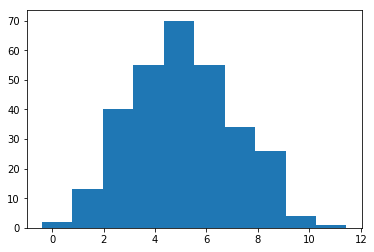

In [39]:
normal_data_arr = np.random.normal(loc=5, scale=2, size = 300)
normal_data_arr 

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(normal_data_arr)

In [40]:
differences_lt = []
for i in range(1000):

    normal_data_arr_1 = np.random.normal(loc=68, scale=15, size = 50)
    normal_data_arr_2 = np.random.normal(loc=68, scale=15, size = 50)

    difference = normal_data_arr_1.mean() - normal_data_arr_2.mean()
    differences_lt.append(difference)
differences_lt = sorted(differences_lt)


(array([  2.,  15.,  47., 124., 210., 257., 171., 115.,  41.,  18.]),
 array([-10.28279084,  -8.39793634,  -6.51308184,  -4.62822735,
         -2.74337285,  -0.85851835,   1.02633615,   2.91119064,
          4.79604514,   6.68089964,   8.56575413]),
 <a list of 10 Patch objects>)

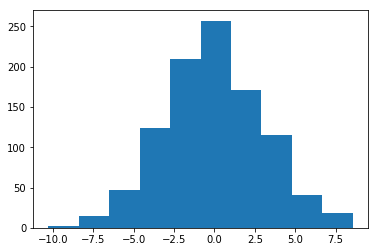

In [41]:
plt.hist(differences_lt)

In [42]:
differences_lt[24]

-6.110538896592487

In [43]:
differences_lt[974]

6.061206270514937

In [44]:
import scipy.stats as stats

In [45]:
stats.ttest_ind(female_sp_authors["life-span"], male_sp_authors["life-span"])

Ttest_indResult(statistic=0.7711422452448259, pvalue=0.4420113045836843)

P-Wert liegt über 0.05, deswegen kann die Null-Hypothese nicht falzifiziert werden: in diesem Datensatz, Frauen leben länger als Männer, aber der Unterschied ist nicht statistisch signifikant.